# Format data from Tabula Muris

In [75]:
tm_data_dir = "/Users/josh/src/tabula-muris-vignettes/data/"
data_dir = '/Users/josh/src/noise2self-single-cell/data/'

In [76]:
tm_data_file = tm_data_dir + 'TM_droplet_mat.h5ad'
tm_meta_file = tm_data_dir + 'TM_droplet_metadata.csv'

In [77]:
import scanpy as sc
import pandas as pd

In [78]:
tmdata = sc.read(tm_data_file)

In [79]:
tmdata = tmdata.T

In [80]:
meta = pd.read_csv(tm_meta_file)

/Users/josh/anaconda3/envs/pytorch/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (4,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [81]:
meta.index = meta['cell']

In [82]:
tmdata.obs = meta

## Export hepatocytes

In [83]:
hep = tmdata[tmdata.obs['cell_ontology_class'] == 'hepatocyte']

In [84]:
sc.pp.filter_cells(hep, min_counts=1000)
sc.pp.filter_genes(hep, min_cells=10)

In [85]:
hep

AnnData object with n_obs × n_vars = 1764 × 10065 
    obs: 'cell', 'channel', 'mouse.id', 'tissue', 'subtissue', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_counts'
    var: 'n_cells'

In [71]:
sc.write(data_dir + 'tabulamuris/hepatocytes.h5ad', hep, compression=None)

... storing 'channel' as categorical
... storing 'mouse.id' as categorical
... storing 'tissue' as categorical
... storing 'subtissue' as categorical
... storing 'mouse.sex' as categorical
... storing 'method' as categorical
... storing 'cell_ontology_class' as categorical
... storing 'cell_ontology_id' as categorical
... storing 'free_annotation' as categorical


## Export marrow

In [86]:
marrow = tmdata[tmdata.obs['tissue'] == 'Marrow']

In [87]:
sc.pp.filter_cells(marrow, min_counts=1000)
sc.pp.filter_genes(marrow, min_cells=10)

In [88]:
marrow

AnnData object with n_obs × n_vars = 4112 × 12728 
    obs: 'cell', 'channel', 'mouse.id', 'tissue', 'subtissue', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_counts'
    var: 'n_cells'

In [74]:
sc.write(data_dir + 'tabulamuris/marrow.h5ad', marrow, compression=None)

... storing 'channel' as categorical
... storing 'mouse.id' as categorical
... storing 'tissue' as categorical
... storing 'subtissue' as categorical
... storing 'mouse.sex' as categorical
... storing 'method' as categorical
... storing 'cell_ontology_class' as categorical
... storing 'cell_ontology_id' as categorical
... storing 'free_annotation' as categorical


# Paul et al

In [43]:
paul = pd.read_csv('https://github.com/KrishnaswamyLab/PHATE/raw/master/data/BMMC_myeloid.csv.gz', index_col = 0)

In [68]:
pauldata = sc.AnnData(paul)

In [69]:
sc.pp.filter_cells(pauldata, min_counts=1000)
sc.pp.filter_genes(pauldata, min_cells=10)

In [70]:
pauldata

AnnData object with n_obs × n_vars = 2417 × 10783 
    obs: 'n_counts'
    var: 'n_cells'

In [71]:
sc.write(data_dir + 'paul/paul.h5ad', pauldata, compression=None)

# HCA Marrow

In [2]:
hca = sc.read_10x_h5('/Users/josh/Downloads/ica_bone_marrow_h5 (1).h5')

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [3]:
hca.var_names_make_unique()

In [4]:
sc.pp.filter_cells(hca, min_counts=1000)
sc.pp.filter_genes(hca, min_cells=10)

In [50]:
import numpy as np
counts = hca.X.sum(axis = 1)
counts = np.array(counts).ravel()

In [51]:
import matplotlib.pyplot as plt

(array([2.88308e+05, 7.84500e+03, 2.68700e+03, 5.11000e+02, 4.70000e+01,
        3.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([   998. ,  16237.1,  31476.2,  46715.3,  61954.4,  77193.5,
         92432.6, 107671.7, 122910.8, 138149.9, 153389. ], dtype=float32),
 <a list of 10 Patch objects>)

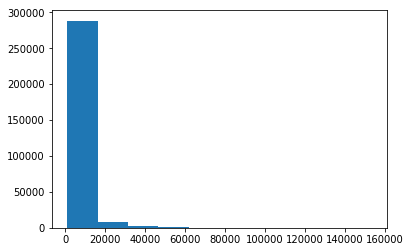

In [52]:
plt.hist(counts)

(array([622., 352., 172.,  81.,  36.,   6.,   3.,   0.,   1.,   1.,   0.,
          0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([ 40011. ,  45679.9,  51348.8,  57017.7,  62686.6,  68355.5,
         74024.4,  79693.3,  85362.2,  91031.1,  96700. , 102368.9,
        108037.8, 113706.7, 119375.6, 125044.5, 130713.4, 136382.3,
        142051.2, 147720.1, 153389. ], dtype=float32),
 <a list of 20 Patch objects>)

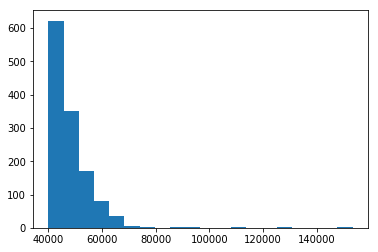

In [53]:
plt.hist(counts[counts > 40000], bins = 20)

We split the dataset into two parts:
    
1. all cells with > 2k reads, downsampled to 2k.
2. all the reads from cells with > 40k reads. (can compute remaining by subtracting off.)

We may want to do this in batches, since making the whole thing dense may be costly. Wow loving scanpy right now, they have built this in with numba jit.

In [56]:
hca = hca[hca.obs['n_counts'] > 2000]

In [73]:
hca

View of AnnData object with n_obs × n_vars = 203958 × 22415 
    obs: 'n_counts'
    var: 'gene_ids', 'n_cells'

In [57]:
downsampled_hca = sc.pp.downsample_counts(hca, 2000, replace = False, copy = True)

In [65]:
sc.write(data_dir + 'hca/hca_marrow_2k.h5ad', downsampled_hca)

In [66]:
hca_deep_cells = hca[hca.obs['n_counts'] > 40000]

In [74]:
hca_deep_cells

AnnData object with n_obs × n_vars = 1277 × 22415 
    obs: 'n_counts'
    var: 'gene_ids', 'n_cells'

In [67]:
sc.write(data_dir + 'hca/hca_marrow_deep.h5ad', hca_deep_cells)